# Linear Regression in using Scikit-Learn

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes


## Step 1 - Load Data

In [1]:
import pandas as pd

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
                        'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]})
tip_data

,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2 - Exploratory Data Analytics (EDA)
Do some basic plots ..etc

In [2]:
## describe
tip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bill,10.0,35.0,18.708287,10.0,21.25,32.5,47.5,65.0
tip,10.0,7.1,4.771443,2.0,3.25,6.0,11.0,15.0


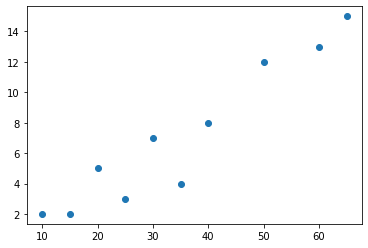

In [3]:
## plot 
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(tip_data['bill'], tip_data['tip'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bill', ylabel='tip'>

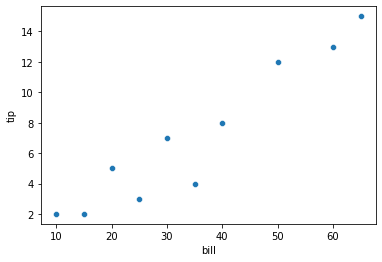

In [4]:
import seaborn as sns
sns.scatterplot('bill', 'tip', data = tip_data)

## Step 3 - Shape Data

In [5]:
## don't forget the double brackets!
## x is a dataframe
## TODO  : x is 'bill'
x = tip_data[['bill']]
print(x)

## don't forget the double brackets!
## y is a dataframe
## TODO : y is tip
y = tip_data[['tip']]
print (y)

   bill
0  50.0
1  30.0
2  60.0
3  40.0
4  65.0
5  20.0
6  10.0
7  15.0
8  25.0
9  35.0
    tip
0  12.0
1   7.0
2  13.0
3   8.0
4  15.0
5   5.0
6   2.0
7   2.0
8   3.0
9   4.0


## Step 5 : Do Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

## TODO : fit with (x,y)
model = LinearRegression ().fit(x, y)
model

LinearRegression()

## Step 6 : Predict

In [7]:
## TODO : predict on x
predictions = model.predict (y)
predictions

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- tip
Feature names seen at fit time, yet now missing:
- bill

  warnings.warn(message, FutureWarning)


array([[ 1.51428571],
       [ 0.3       ],
       [ 1.75714286],
       [ 0.54285714],
       [ 2.24285714],
       [-0.18571429],
       [-0.91428571],
       [-0.91428571],
       [-0.67142857],
       [-0.42857143]])

In [8]:
## Compare actual vs. predictions

tip_data['predictions'] = predictions
tip_data

,bill,tip,predictions
0,50.0,12.0,1.514286
1,30.0,7.0,0.300000
2,60.0,13.0,1.757143
3,40.0,8.0,0.542857
4,65.0,15.0,2.242857
5,20.0,5.0,-0.185714
6,10.0,2.0,-0.914286
7,15.0,2.0,-0.914286
8,25.0,3.0,-0.671429
9,35.0,4.0,-0.428571


## Step 7 : Evaluate

We can see the model coefficients from below
- slope : 0.24
- intercept : -1.4

And R2 is 90%.  That is pretty good!

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
print ("slope : ", slope, ", intercept: ", intercept)

print ("R2 : " , r2_score(y, predictions))

print ("MSE : ", mean_squared_error(y, predictions))
print ("RMSE : ", sqrt(mean_squared_error(y, predictions)) )

Coefficients: [[0.24285714]]
intercept: [-1.4]
slope :  0.2428571428571429 , intercept:  -1.4000000000000021
R2 :  -1.8138853198673326
MSE :  57.65651020408164
RMSE :  7.593188408309229


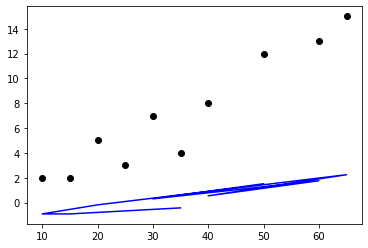

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y , color="black")
plt.plot(x, predictions, color='blue')

## Step 8 : Predict on some new data

In [11]:
## TODO : create a new dataframe with amounts : 100, 200, 300
new_data = pd.DataFrame({'bill' : [100,200, 300]})
new_data

,bill
0,100
1,200
2,300


In [12]:
new_tips = model.predict (new_data)
new_tips

array([[22.88571429],
       [47.17142857],
       [71.45714286]])

In [13]:
new_data['predicted_tip'] = new_tips
new_data

,bill,predicted_tip
0,100,22.885714
1,200,47.171429
2,300,71.457143
